In [12]:
import os
from JSON_DataFrame_converter import extract_df_from_json_tweets_data
from Zipf import ngram_frequency,zipf_regression
import matplotlib.pyplot as plt


In [13]:
acoes = ["PETR4","VALE3"]

In [14]:
texts_acoes = []
for acao in acoes:
    #pegar textos
    df = extract_df_from_json_tweets_data(os.path.join("Scrapping Tweets",acao))
    # concatenar textos
    texts_acoes.append((df.text + " ").sum())


In [21]:
print(texts_acoes[0][:100])
print('-'*1000)
print(texts_acoes[1][:100])

1 like (e PETR4 a 50 reais) e eu monto um consultório desses. https://t.co/0jhUJ3IsDH Tem PUT longas
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
with open("temp.txt","w", encoding= 'utf8') as f:
    f.write(texts_acoes[0])

In [16]:
freqs_n = {}
for acao,text_acao in zip(acoes,texts_acoes):
    freqs_n[acao] = []
    # unigram, digram, trigram
    for n in range(1,4): 
        freqs_n[acao].append(ngram_frequency(text_acao, n))
    


In [17]:
freqs_n["PETR4"][0].items()

dict_items([(('1',), 30), (('like',), 1), (('(e',), 3), (('PETR4',), 323), (('a',), 1116), (('50',), 6), (('reais)',), 1), (('e',), 1273), (('eu',), 25), (('monto',), 1), (('um',), 171), (('consultório',), 1), (('desses.',), 1), (('https://t.co/0jhUJ3IsDH',), 1), (('Tem',), 10), (('PUT',), 10), (('longas?',), 2), (('Pra',), 7), (('anual?',), 1), (('https://t.co/DSkdgKgC2D',), 1), (('#PETR4',), 882), (('gap',), 3), (('lindão',), 1), (('sem',), 31), (('susto!',), 1), (('Feijão',), 1), (('com',), 533), (('arroz:',), 1), (('Espera',), 1), (('topo',), 10), (('5',), 25), (('candles,',), 1), (('testou',), 1), (('61',), 2), (('não',), 236), (('vendeu',), 5), (('dale!',), 1), (('https://t.co/Qtrt1EK7B8',), 1), (('Gasolina',), 4), (('diesel',), 50), (('novamente',), 4), (('defasagem',), 4), (('em',), 980), (('relação',), 24), (('ao',), 123), (('PPI',), 13), (('👀',), 6), (('Será',), 12), (('que',), 775), (('vem',), 23), (('mais',), 285), (('aumento',), 26), (('por',), 268), (('aí?',), 4), (('👀👀👀'

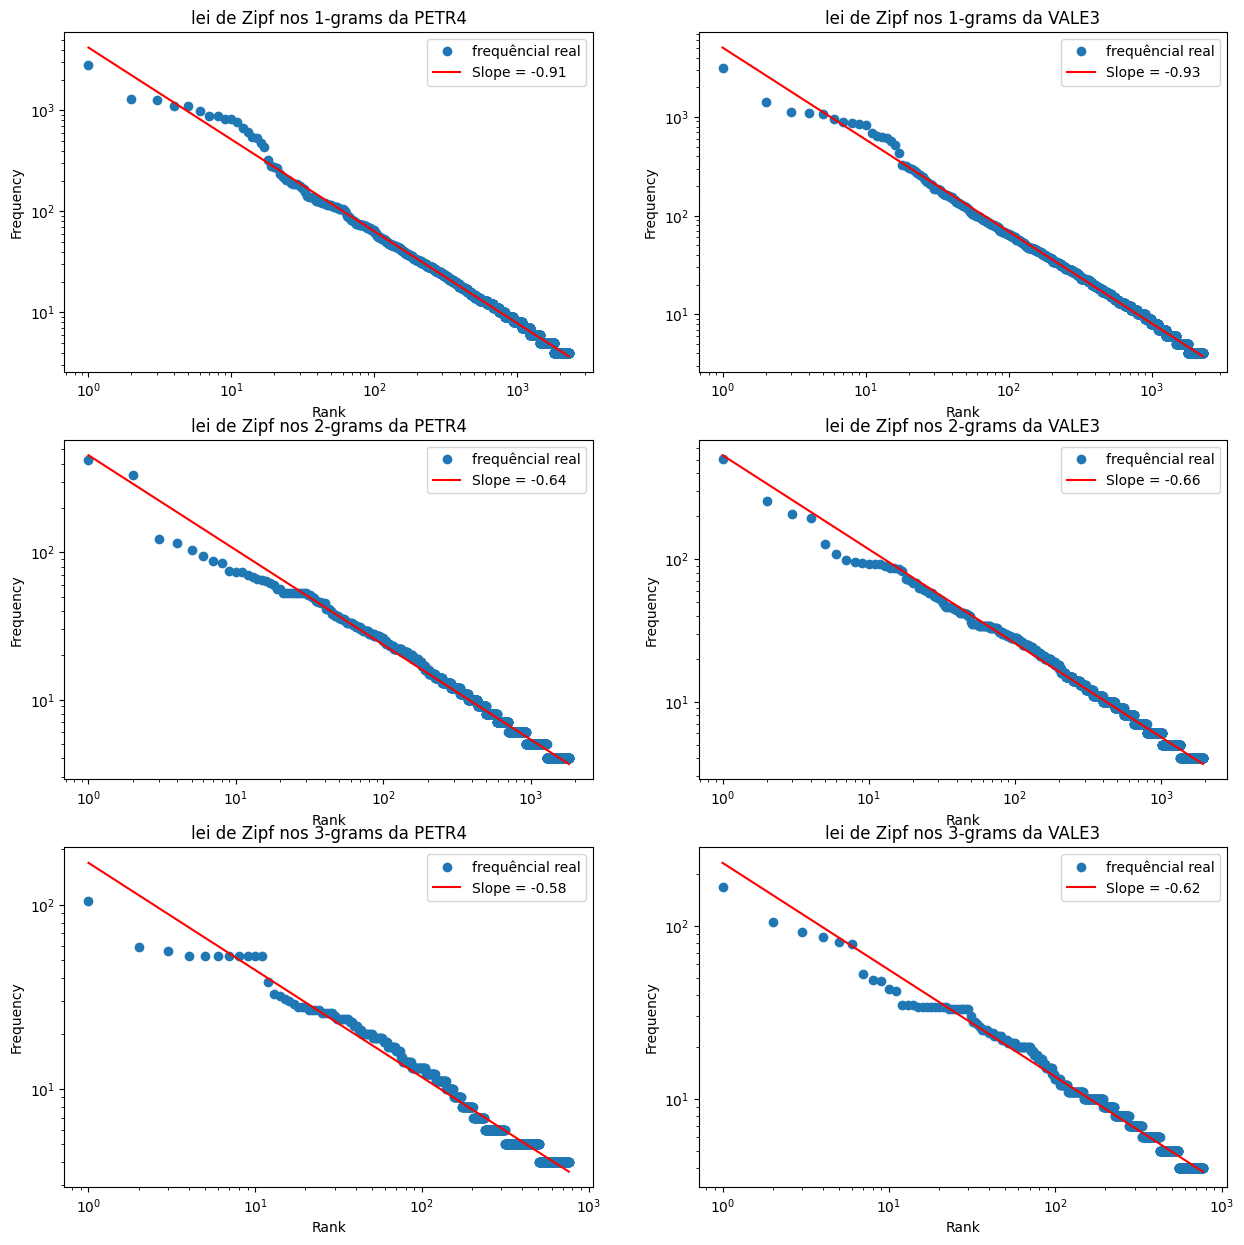

In [18]:
plt.figure(figsize=(15,15))
i = 0
p_values = {}
for acao in acoes:
    p_values[acao] = []
for n in range(1,4): 
    for acao in acoes:
        freqs = freqs_n[acao][n-1]
        i+=1
        plt.subplot(3,2,i)
        _, p_value = zipf_regression(freqs, titulo= f"lei de Zipf nos {n}-grams da {acao}")
        p_values[acao].append(p_value)
plt.show()


# Testes de hiposte

O valor p_value serve para um teste de hipótese cuja hipótese nula é que a inclinação é zero,
usando o teste Wald com distribuição t da estatística de teste.

In [19]:
p_values

{'PETR4': [0.0, 0.0, 0.0], 'VALE3': [0.0, 0.0, 0.0]}

Para todo alpha (nível de significância) que escolhermos, deveremos rejeitar a hipótese nula, pois os p_values foram 0. 
Podemos ver claramente a correlação entre os eixos no gráfico